### Linear regression

 - Linear rergression is a supervised learning algorithm
 - When the target variable is a quantitative variable, it is a regression problem, when it's a categorical one, it is a classification problem
 - A problem in the form of y = a + b*X
 - Ordinary Least Squares: the loss function minimizes the sum of the squared distance between the fitted line and the observations (residuals)
 - Evaluation with R^2 (% of variance explained by the features) or Root Square Mean Error (differences between the values predicted by a model and the values observed https://en.wikipedia.org/wiki/Root-mean-square_deviation)

 - Learn more: https://en.wikipedia.org/wiki/Linear_regression

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import scale

# Import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [37]:
wines = load_wine()
all_features = pd.DataFrame(scale(wines['data']), columns = wines['feature_names'])
target = pd.DataFrame(all_features['alcohol'])
features = all_features.drop('alcohol',axis=1)

# Create arrays for the features and the response variable
y = target.values.reshape(-1)
X = features.values

display(y.shape, X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.35,
                                                    shuffle=False,
                                                    random_state=21)

(178,)

(178, 12)

In [45]:
# Create the regressor: reg
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train,y_train)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(X_test)

# Print R^2 
print("R^2 in training set:", reg.score(X_train, y_train))


# Compute and print R^2 and RMSE
print("R^2 in test set: {}".format(reg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2 in training set: 0.701012419155766
R^2 in test set: -0.12787423372986906
Root Mean Squared Error: 0.9112767006916885


In [46]:
# For a single feature you can use the following plot:

# Create the prediction space
# prediction_space = np.linspace(min(X), max(X)).reshape(1,-1)

# Plot regression line
# plt.plot(prediction_space, y_pred, color='black', linewidth=3)
# plt.show()

#### k-fold cross validation

 - R^2 is dependent on the way the data is split
 - Not representative of the model's ability to generalise
 - Cross validation splits multiple times the original data set to different sets (folds) of training and test sets
 - Each fold has a different test and training sample than the other folds
 - You can compute the R^2 on each fold and then calculate their mean or 95% confidence intervals
 - Cross validation maximizes the amount of data that is used to train the model, as during the course of training, the model is not only trained, but also tested on all of the available data
 - More folds = more computations

In [48]:
# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg,X,y,cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[-0.51847929  0.40456596 -0.73716381 -0.46995099 -0.47213708]
Average 5-Fold CV Score: -0.35863304352666964


In [62]:
%time
# Perform 3-fold CV
cvscores_3 = cross_val_score(reg, X, y, cv=3)
print(np.mean(cvscores_3))

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 11.2 µs
-3.4277194749086246


In [63]:
%time
# Perform 10-fold CV
cvscores_10 = cross_val_score(reg, X, y, cv=10)
print(np.mean(cvscores_10))

CPU times: user 6 µs, sys: 1e+03 ns, total: 7 µs
Wall time: 12.9 µs
-0.5146297435482603


#### Regularization

 - The linear regression estimates feature coefficients through minimizing a loss function
 - Large coefficients can lead to overfitting
 - Regularizations penalizes larger coefficients

#### Ridge regression

 - Loss function = OLS + a * Σ(b_i)^2, where b_i = coefficient for variable i
 - The second argument penalizes large (positive or negative) coefficients
 - The alpha (or lamda) is a hyperparameter that you must choose (similar to k in kNN)
 - if alpha = 0, then the regression is OLS
 - Very high alpha can lead to underfitting the data

#### Lasso regresssion

 - Loss function = OLS + a * Σ|b_i| where b_i = coefficient for variable i
 - Can be used to select important features of a dataset
 - It shrinks the coefficients of less important features to 0

[ 0.  0. -0.  0.  0.  0. -0.  0.  0. -0.  0.  0.]


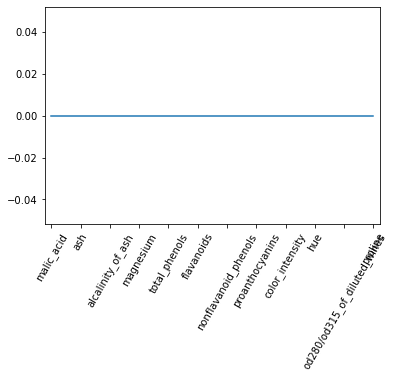

In [65]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4,normalize=True)

# Fit the regressor to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

# Plot the coefficients
plt.plot(range(len(features.columns)), lasso_coef)
plt.xticks(range(len(features.columns)), features.columns, rotation=60)
plt.margins(0.02)
plt.show()


#### Lasso vs Ridge

Lasso is great for feature selection, but when building regression models, Ridge regression should be your first choice.

Recall that lasso performs regularization by adding to the loss function a penalty term of the absolute value of each coefficient multiplied by some alpha. This is also known as L1 regularization because the regularization term is the L1 norm of the coefficients. This is not the only way to regularize, however.

If instead you took the sum of the squared values of the coefficients multiplied by some alpha - like in Ridge regression - you would be computing the L2 norm. 

In [68]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

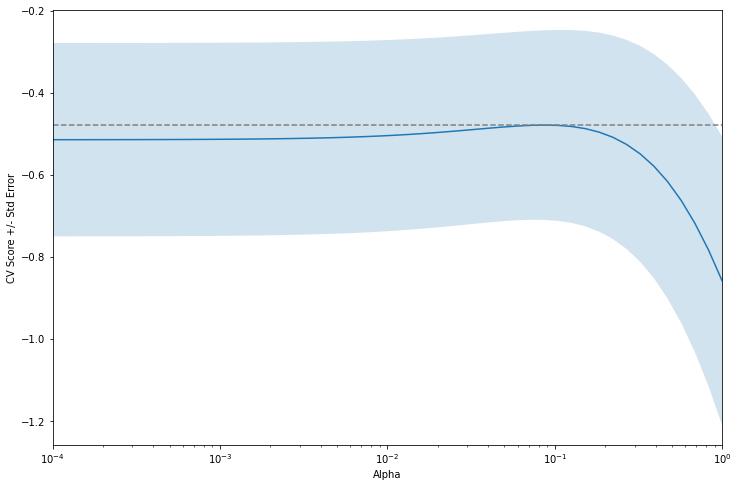

In [69]:
# Import necessary modules
from sklearn.linear_model import Ridge

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)
